## Overview of the dataset
Here I will load the trial summary tables that include codes associated with Subjects and Activities

Subjects are grouped as follows

    SA: Adults subjects between 19 and 30 years old
    SE: Elderly people between 60 and 75 years old
    
Activities are grouped as follows

    F: Falls
    A: Activities of daily life (ADL)

In [1]:
import pandas as pd
import os

Load each of the summaries as dataframes to keep things organized.

In [2]:
def load_summary_as_df(fname):
    df = pd.read_csv(fname, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()
    for col in df.columns:
        if df[col].dtype.kind not in 'biufc':
            df[col] = df[col].str.strip()
    df.sort_values('ID')
    return df

subjects = load_summary_as_df("Subjects.txt")
activity = load_summary_as_df("Activities.txt")

In [3]:
subjects

,ID,Age,Height,Weight,Gender
0,SA01,26,165,53.0,F
1,SA02,23,176,58.5,M
2,SA03,19,156,48.0,F
3,SA04,23,170,72.0,M
4,SA05,22,172,69.5,M
5,SA06,21,169,58.0,M
6,SA07,21,156,63.0,F
7,SA08,21,149,41.5,F
8,SA09,24,165,64.0,M
9,SA10,21,177,67.0,M


In [4]:
activity

,ID,Activity,Trials,Duration
0,D01,Walking slowly,1,100s
1,D02,Walking quickly,1,100s
2,D03,Jogging slowly,1,100s
3,D04,Jogging quickly,1,100s
4,D05,Walking upstairs and downstairs slowly,5,25s
5,D06,Walking upstairs and downstairs quickly,5,25s
6,D07,"Slowly sit in a half height chair, wait a mome...",5,12s
7,D08,"Quickly sit in a half height chair, wait a mom...",5,12s
8,D09,"Slowly sit in a low height chair, wait a momen...",5,12s
9,D10,"Quickly sit in a low height chair, wait a mome...",5,12s


Now load all trials for each combination of subjects and activities.

In [5]:
import glob
trial_dict = {}
for _s in subjects.ID:
    for _a in activity.ID:
        dpath = os.path.abspath(_s)
        fpath = os.path.join(dpath,_a)
        files = glob.glob("%s*.txt" % fpath)
        trial_dict[_s,_a] = []
        for _f in files:
            _t = os.path.split(_f)[-1].split('_')[-1].split('.')[0]
            trial_dict[_s,_a].append(_t)
        trial_dict[_s,_a].sort()
        print(_s, _a, "has", len(trial_dict[_s,_a]), "trials")

SA01 D01 has 1 trials
SA01 D02 has 1 trials
SA01 D03 has 1 trials
SA01 D04 has 1 trials
SA01 D05 has 5 trials
SA01 D06 has 5 trials
SA01 D07 has 5 trials
SA01 D08 has 5 trials
SA01 D09 has 5 trials
SA01 D10 has 5 trials
SA01 D11 has 5 trials
SA01 D12 has 5 trials
SA01 D13 has 5 trials
SA01 D15 has 5 trials
SA01 D16 has 5 trials
SA01 D17 has 5 trials
SA01 D18 has 5 trials
SA01 D19 has 5 trials
SA01 F01 has 5 trials
SA01 F02 has 5 trials
SA01 F03 has 5 trials
SA01 F04 has 5 trials
SA01 F05 has 5 trials
SA01 F06 has 5 trials
SA01 F07 has 5 trials
SA01 F08 has 5 trials
SA01 F09 has 5 trials
SA01 F10 has 5 trials
SA01 F11 has 5 trials
SA01 F12 has 5 trials
SA01 F13 has 5 trials
SA01 F14 has 5 trials
SA01 F15 has 5 trials
SA02 D01 has 1 trials
SA02 D02 has 1 trials
SA02 D03 has 1 trials
SA02 D04 has 1 trials
SA02 D05 has 5 trials
SA02 D06 has 5 trials
SA02 D07 has 5 trials
SA02 D08 has 5 trials
SA02 D09 has 5 trials
SA02 D10 has 5 trials
SA02 D11 has 5 trials
SA02 D12 has 5 trials
SA02 D13 h

SA12 F10 has 5 trials
SA12 F11 has 5 trials
SA12 F12 has 5 trials
SA12 F13 has 5 trials
SA12 F14 has 5 trials
SA12 F15 has 5 trials
SA13 D01 has 1 trials
SA13 D02 has 1 trials
SA13 D03 has 1 trials
SA13 D04 has 1 trials
SA13 D05 has 5 trials
SA13 D06 has 5 trials
SA13 D07 has 5 trials
SA13 D08 has 5 trials
SA13 D09 has 5 trials
SA13 D10 has 5 trials
SA13 D11 has 5 trials
SA13 D12 has 5 trials
SA13 D13 has 5 trials
SA13 D15 has 5 trials
SA13 D16 has 5 trials
SA13 D17 has 5 trials
SA13 D18 has 5 trials
SA13 D19 has 5 trials
SA13 F01 has 5 trials
SA13 F02 has 5 trials
SA13 F03 has 5 trials
SA13 F04 has 5 trials
SA13 F05 has 5 trials
SA13 F06 has 5 trials
SA13 F07 has 5 trials
SA13 F08 has 5 trials
SA13 F09 has 5 trials
SA13 F10 has 5 trials
SA13 F11 has 5 trials
SA13 F12 has 5 trials
SA13 F13 has 5 trials
SA13 F14 has 5 trials
SA13 F15 has 5 trials
SA14 D01 has 1 trials
SA14 D02 has 1 trials
SA14 D03 has 1 trials
SA14 D04 has 1 trials
SA14 D05 has 5 trials
SA14 D06 has 5 trials
SA14 D07 h

SE02 F03 has 0 trials
SE02 F04 has 0 trials
SE02 F05 has 0 trials
SE02 F06 has 0 trials
SE02 F07 has 0 trials
SE02 F08 has 0 trials
SE02 F09 has 0 trials
SE02 F10 has 0 trials
SE02 F11 has 0 trials
SE02 F12 has 0 trials
SE02 F13 has 0 trials
SE02 F14 has 0 trials
SE02 F15 has 0 trials
SE03 D01 has 1 trials
SE03 D02 has 1 trials
SE03 D03 has 1 trials
SE03 D04 has 1 trials
SE03 D05 has 5 trials
SE03 D06 has 0 trials
SE03 D07 has 5 trials
SE03 D08 has 5 trials
SE03 D09 has 5 trials
SE03 D10 has 5 trials
SE03 D11 has 5 trials
SE03 D12 has 5 trials
SE03 D13 has 0 trials
SE03 D15 has 5 trials
SE03 D16 has 5 trials
SE03 D17 has 5 trials
SE03 D18 has 0 trials
SE03 D19 has 0 trials
SE03 F01 has 0 trials
SE03 F02 has 0 trials
SE03 F03 has 0 trials
SE03 F04 has 0 trials
SE03 F05 has 0 trials
SE03 F06 has 0 trials
SE03 F07 has 0 trials
SE03 F08 has 0 trials
SE03 F09 has 0 trials
SE03 F10 has 0 trials
SE03 F11 has 0 trials
SE03 F12 has 0 trials
SE03 F13 has 0 trials
SE03 F14 has 0 trials
SE03 F15 h

Using `trial_dict` I can then count the total number of trials and access specific lists of trials for a given `trial_dict` key that is the pair of subject and activity IDs.

1254 entries
4315 trials
0 entries without trials


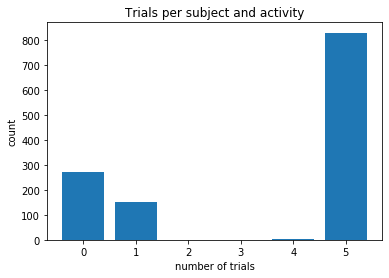

In [6]:
import numpy as np
import matplotlib.pyplot as plt
total = 0
notrial = 0
n_trials = [[], []]
for key in trial_dict.keys():
    _nt = len(trial_dict[key])
    total += _nt
    n_trials[0].append(_nt)
    if n_trials == 0:
        notrial += 1
print(len(trial_dict.keys()), "entries")
print(total, "trials")
print(notrial, "entries without trials")

n_trials = np.array(n_trials)
plt.hist(n_trials[0], bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5], 
         rwidth = 0.8, align='mid')
plt.title("Trials per subject and activity")
plt.xlabel("number of trials")
plt.ylabel("count")
plt.show()

In [7]:
trial_dict[list(trial_dict.keys())[10]]

['R01', 'R02', 'R03', 'R04', 'R05']

We need a consistent way to get the filepath, so here's a function for that:

In [8]:
def fpath(sub,act,trial):
    _fn = "%s_%s_%s.txt" % (act,sub,trial)
    _fp = os.path.abspath(sub)
    _fp = os.path.join(_fp,_fn)
    return _fp

and this allows us to use the subject, activity, and trial to call the correct file on arbitrary OS.

In [9]:
sub, act = list(trial_dict.keys())[20]
trial = trial_dict[sub,act][-1]
print(fpath(sub,act,trial))

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F03_SA01_R05.txt


In [10]:
def age_of_subject(subject_id):
    return int(subjects[subjects.ID == subject_id].Age)

def activity_str(activity_id):
    return activity.loc[activity.ID == activity_id]['Activity'].values[0]

print("Subject age %i" % age_of_subject(sub))
print("  %s" % activity_str(act))

Subject age 26
  Lateral fall while walking caused by a slip


# Defining a trial class

This is pretty simple for now, but has the most basic components of what I'm calling the `Trial` class.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [88]:
class Trial:
    
    def __init__(self, fname, age, action, trial_id,
                 fps = 200,
                 features = ["ax","ay","az",
                             "rx","ry","rz",
                             "ax2","ay2","az2"]):
        self.fname = fname
        self.df = pd.read_csv(fname, header=None)
        self.df.columns = features
        self.fps = fps
        self.age = age
        self.action = action
        self.id = trial_id
        
        self.fall = False
        if action[0] == 'F':
            self.fall = True
        
    def print_info(self):
        print("  Trial Info")
        print("         age:", self.age)
        print("      action:", self.action)
        print("          ID:", self.id)
        print("         fps:", self.fps)
        print("       steps:", len(self.df))
        print("     time(s):", len(self.df)/self.fps)
        print("        file:", self.fname)
        #print("    features:", list(self.df.columns))
        print("\n")
        
    def plot(self, cols, title = None):
        for col in cols:
            plt.plot(self.df.index/self.fps, self.df[col], 
                     label = col)
            plt.xlabel("time (sec)")
            plt.ylabel("signal")
            plt.legend()
            plt.title(title)
        plt.show()
        plt.clf()
        
    def hist(self, cols, title = None):
        for col in cols:
            plt.hist(self.df[col], bins = 40, 
                     alpha = 0.5, label = col)
            plt.xlabel("signal")
            plt.ylabel("freq.")
            plt.legend()
            plt.title(title)
        plt.show()
        plt.clf()
        
    def get_features(self,cols):
        return self.df[cols].values, int(self.fall)

and I can just take this and define an instance of a `Trial` in the following ways...

  Trial Info
         age: 26
      action: Gently jump without falling (trying to reach a high object)
          ID: R01
         fps: 200
       steps: 2400
     time(s): 12.0
        file: /home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D19_SA01_R01.txt




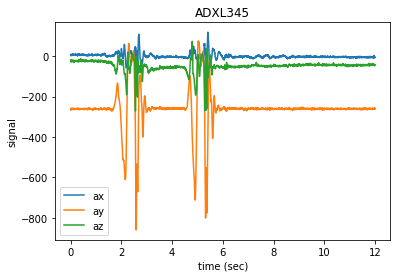

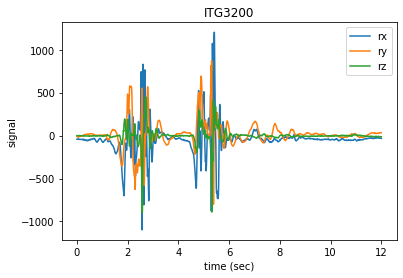

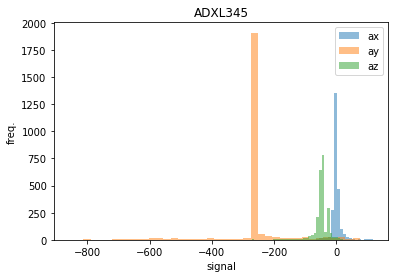

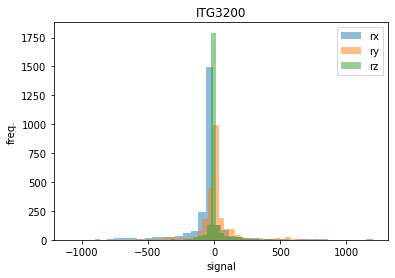

(array([[-42,  -8,  -1],
        [-42,  -9,  -1],
        [-43,  -9,   0],
        ...,
        [-31,  34, -15],
        [-31,  33, -13],
        [-32,  33, -14]]),
 0)

<Figure size 432x288 with 0 Axes>

In [89]:
_subject = 'SA01'
_activity = 'D19'
_tnum = 'R01'

_trial = Trial( fpath(_subject,_activity,_tnum), 
                age_of_subject(_subject),
                activity_str(_activity), _tnum )
_trial.print_info()

trace = { 'ADXL345':  ['ax','ay','az'],
           'ITG3200':  ['rx','ry','rz'],
           'MMA8451Q': ['ax2','ay2','az2'] }

for sensor in list(trace.keys())[:-1]:
    _trial.plot(trace[sensor], sensor)

for sensor in list(trace.keys())[:-1]:
    _trial.hist(trace[sensor], sensor)
    
_trial.get_features(trace['ITG3200'])

In [ ]:
sens = 'ITG3200'
_activity = 'F07'
_trial = Trial( fpath(_subject,_activity,_tnum), 
                age_of_subject(_subject),
                activity_str(_activity), _tnum )
_trial.print_info()

_trial.plot(trace[sens])

Note: Just looking at this particular track, it seems like there may be an issue with the last three tracks, particularly the z-acceleration of the `MMA8451Q`. For now, I will just ignore this data and assume it is bad.

Now try to plot some traces using the dataframes we specified earlier.

  Trial Info
         age: 71
      action: Walking slowly
          ID: R01
         fps: 200
       steps: 35999
     time(s): 179.995
        file: /home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SE01/D01_SE01_R01.txt




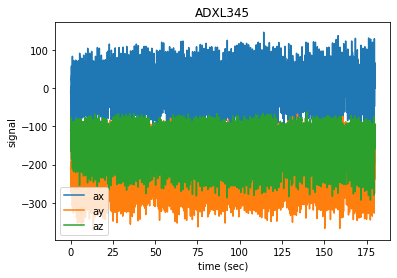

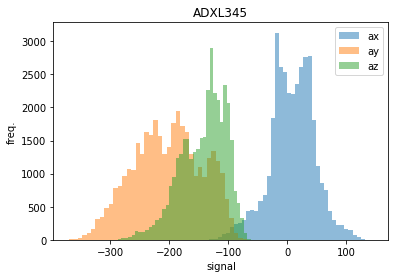

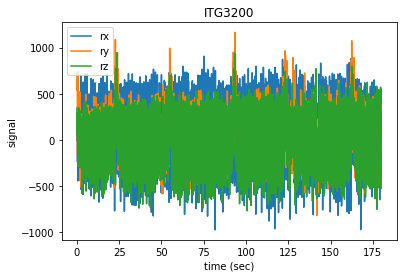

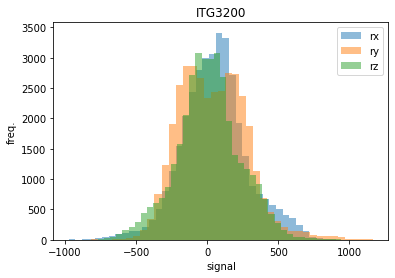

  Trial Info
         age: 71
      action: Walking quickly
          ID: R01
         fps: 200
       steps: 36000
     time(s): 180.0
        file: /home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SE01/D02_SE01_R01.txt




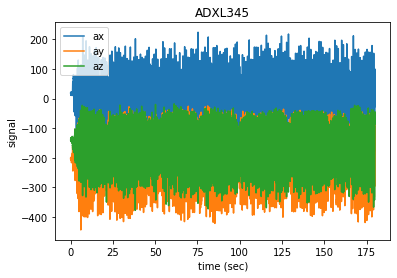

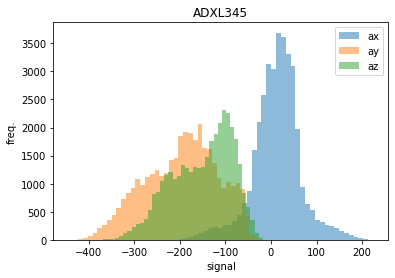

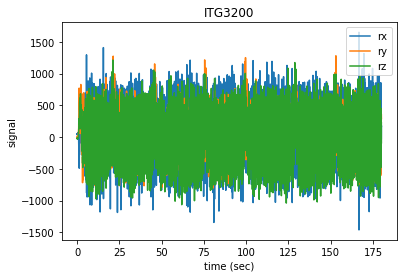

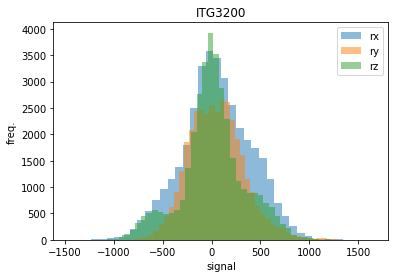

  Trial Info
         age: 71
      action: Jogging slowly
          ID: R01
         fps: 200
       steps: 35999
     time(s): 179.995
        file: /home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SE01/D03_SE01_R01.txt




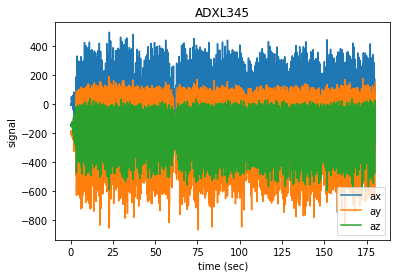

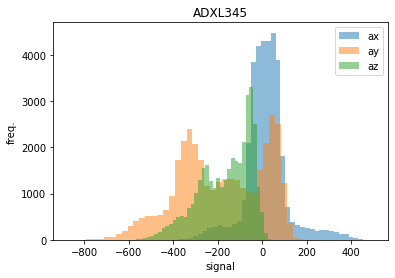

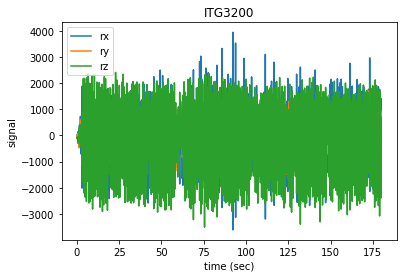

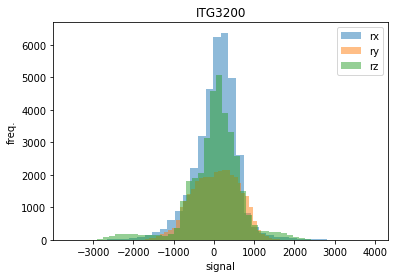

  Trial Info
         age: 71
      action: Jogging quickly
          ID: R01
         fps: 200
       steps: 35999
     time(s): 179.995
        file: /home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SE01/D04_SE01_R01.txt




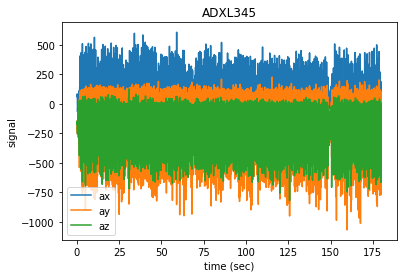

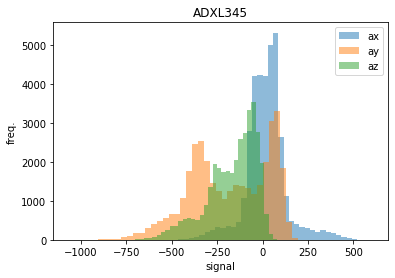

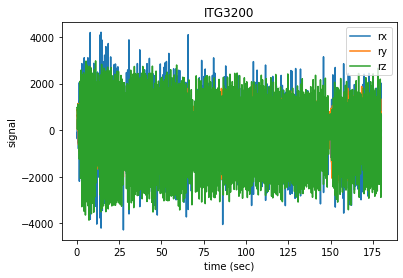

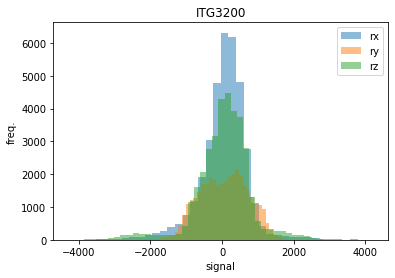

  Trial Info
         age: 71
      action: Walking upstairs and downstairs slowly
          ID: R01
         fps: 200
       steps: 5000
     time(s): 25.0
        file: /home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SE01/D05_SE01_R01.txt




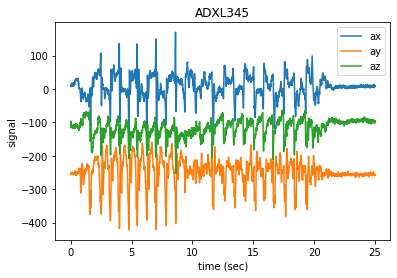

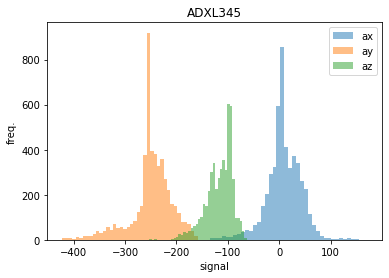

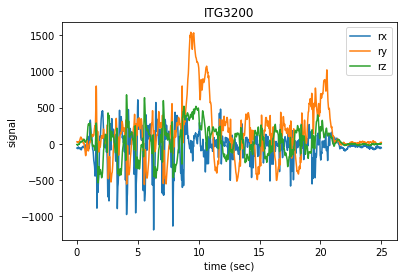

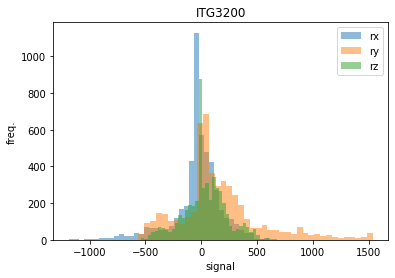

  Trial Info
         age: 71
      action: Walking upstairs and downstairs slowly
          ID: R02
         fps: 200
       steps: 5000
     time(s): 25.0
        file: /home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SE01/D05_SE01_R02.txt




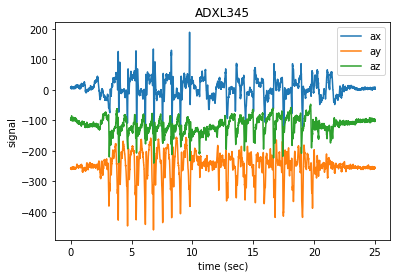

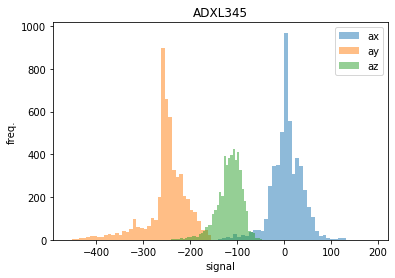

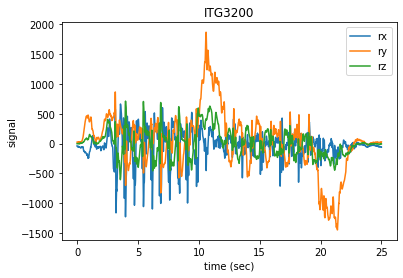

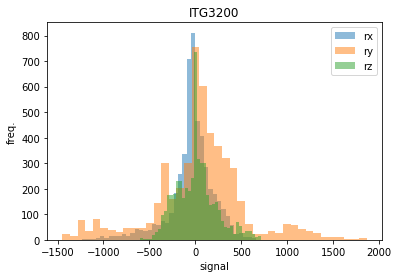

  Trial Info
         age: 71
      action: Walking upstairs and downstairs slowly
          ID: R03
         fps: 200
       steps: 5000
     time(s): 25.0
        file: /home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SE01/D05_SE01_R03.txt




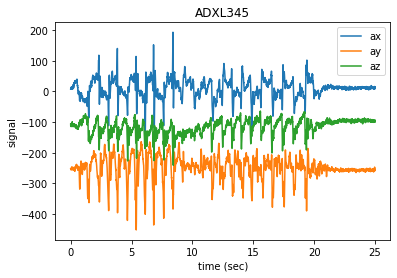

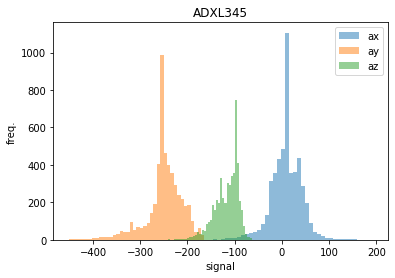

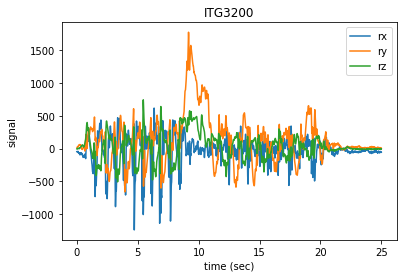

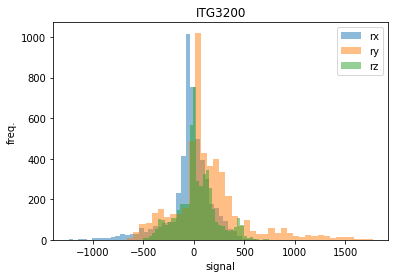

  Trial Info
         age: 71
      action: Walking upstairs and downstairs slowly
          ID: R04
         fps: 200
       steps: 5000
     time(s): 25.0
        file: /home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SE01/D05_SE01_R04.txt




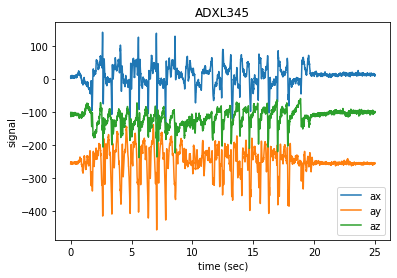

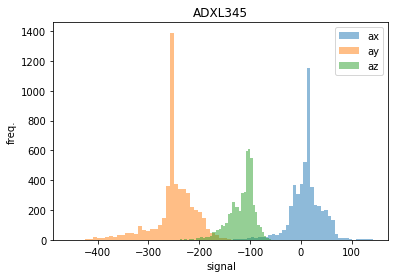

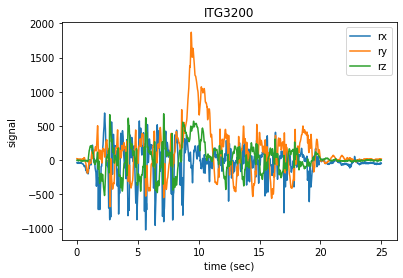

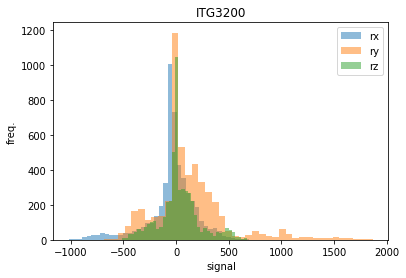

  Trial Info
         age: 71
      action: Walking upstairs and downstairs slowly
          ID: R05
         fps: 200
       steps: 5000
     time(s): 25.0
        file: /home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SE01/D05_SE01_R05.txt




KeyboardInterrupt: 

In [62]:
sensors = [ 'ADXL345', 'ITG3200' ]
for _s in subjects.ID[subjects.ID.str.contains(r'SE', na=True)]:
    for _a in activity.ID:
        for _t in trial_dict[_s,_a]:
            try:
                _trial = Trial(fpath(_s,_a,_t),
                               age_of_subject(_s),
                               activity_str(_a), _t)
                _trial.print_info()
                for sensor in sensors:
                    _trial.plot(trace[sensor],sensor)
                    _trial.hist(trace[sensor],sensor)
            except FileNotFoundError:
                print("No file found for",_s,_a,_t)

Note: Running this loop revealed some mislabeling of data files, so for `SA15` I did the following 

    renamed 'D17_SE15_R01.txt' -> 'D17_SA15_R01.txt'
    renamed 'D17_SE15_R02.txt' -> 'D17_SA15_R02.txt'
    renamed 'D17_SE15_R03.txt' -> 'D17_SA15_R03.txt'
    renamed 'D17_SE15_R04.txt' -> 'D17_SA15_R04.txt'
    renamed 'D17_SE15_R05.txt' -> 'D17_SA15_R05.txt'

In [ ]:
t3.print_info()

Let's now go through and extract the data and the features just for the pitch, yaw, and roll.

In [97]:
sensors = ['ITG3200' ]
data_set = []
for _s in subjects.ID[subjects.ID.str.contains(r'SE', na=True)]:
    for _a in activity.ID:
        for _t in trial_dict[_s,_a]:
            try:
                _trial = Trial(fpath(_s,_a,_t),
                               age_of_subject(_s),
                               activity_str(_a), _t)
                #_trial.print_info()
                for sensor in sensors:
                    _ftr = _trial.get_features(trace[sensor])
                    if len(_ftr[0]) > 0:
                        data_set.append(np.array(_ftr))
            except FileNotFoundError:
                print("No file found for",_s,_a,_t)
data_set = np.array(data_set)

In [104]:
np.random.shuffle(data_set)
_ds = []
_ls = []
for entry in data_set:
    if len(entry[0]) >= 2400:
        _ds.append(entry[0][0:2400])
        _ls.append(entry[1])
signals = np.array(_ds)
labels = np.array(_ls)

In [105]:
signals.shape, labels.shape

((835, 2400, 3), (835,))

In [126]:
import tensorflow as tf
signals = tf.convert_to_tensor(signals)
labels = tf.convert_to_tensor(labels)
len(signals), len(labels)
train_signals, train_labels = signals[:600], labels[:600]
test_signals, test_labels = signals[600:], labels[600:]
print(len(train_signals), len(test_signals))
train_signals.shape

600 235


TensorShape([600, 2400, 3])

In [139]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
model = models.Sequential()

model.add(layers.Conv1D(2400, 3, activation='relu', input_shape=(2400, 3)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(2, 3, activation='relu'))

In [134]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 2398, 2400)        24000     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1199, 2400)        0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1197, 64)          460864    
Total params: 484,864
Trainable params: 484,864
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [141]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 2398, 2400)        24000     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 1199, 2400)        0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1197, 64)          460864    
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 598, 64)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 596, 2)            386       
_________________________________________________________________
flatten (Flatten)            (None, 1192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)              

In [143]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_signals, train_labels, epochs=10, 
                    validation_data=(test_signals, test_labels))

Epoch 1/10
19/19 [==============================] - 31s 2s/step - loss: 3.1162 - accuracy: 0.8517 - val_loss: 0.6427 - val_accuracy: 0.9319
Epoch 2/10
19/19 [==============================] - 30s 2s/step - loss: 0.6120 - accuracy: 0.9433 - val_loss: 0.5838 - val_accuracy: 0.9319
Epoch 3/10
19/19 [==============================] - 30s 2s/step - loss: 0.5552 - accuracy: 0.9433 - val_loss: 0.5321 - val_accuracy: 0.9319
Epoch 4/10
19/19 [==============================] - 30s 2s/step - loss: 0.5056 - accuracy: 0.9433 - val_loss: 0.4884 - val_accuracy: 0.9319
Epoch 5/10
19/19 [==============================] - 30s 2s/step - loss: 0.4635 - accuracy: 0.9433 - val_loss: 0.4505 - val_accuracy: 0.9319
Epoch 6/10
19/19 [==============================] - 30s 2s/step - loss: 0.4260 - accuracy: 0.9433 - val_loss: 0.4182 - val_accuracy: 0.9319
Epoch 7/10
19/19 [==============================] - 30s 2s/step - loss: 0.3941 - accuracy: 0.9433 - val_loss: 0.3896 - val_accuracy: 0.9319
Epoch 8/10
19/19 [==

8/8 - 3s - loss: 0.3260 - accuracy: 0.9319


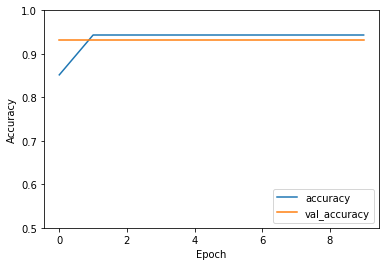

In [144]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_signals,  test_labels, verbose=2)

## Defining a container class
Here, I'll make a container for this class based on the data label.

In [ ]:
class Trials:
    
    def __init__(self, trials = [], name = None):
        if len(trials)
        self.trials = trials
        self.name = name
        
    def print_all_trials(self):
        print(self.name)
        for trial in self.trials:
            trial.print_info()
            print("\n")
    # first, gather all of the relevant files
    files = {}
    dirs = !ls | grep SA

    for dir in dirs:
        print(dir)
        files[dir] = !ls {dir}

    for dir in dirs:
        for file in files[dir]:
            _fn = "%s/%s" % (dir, file)
            if _fn.split('.')[-1] == "txt":
                print(_fn)

    pd.read_csv(_fn, header = None)

In [ ]:
ts = [t1,t2,t3]

In [ ]:
tset = Trials(ts)

In [ ]:
tset.print_all_trials()

In [ ]:
files = {}
dirs = !ls | grep SA
for dir in dirs:
    files[dir] = !ls {dir}